## Testing a simple Policy 

-----

(is it possible to learn anything...)

In [10]:
import numpy as np
import tensorflow as tf
assert len(tf.config.list_physical_devices('GPU')) > 0, "No GPU."

import src.components as cpts
import src.environment as envmt
import src.plot as cplt
from src.test.test_policies import one_dim_test_policy
from src.environment.wrappers import tfpy_env_wrapper

#### Setting up Environment

-----

In [11]:
class Env(
    envmt.WalkerSystemEnv,
    envmt.OneDimDiscreteAction,               # src.env: ContinuousAction, DiscreteAction, OneDimDiscreteAction
    envmt.StateAndDiffObservation,            # src.env: StateAndDiffObservation, GravityObservation, AllPositionsObservation
    envmt.DistanceAndTargetReached
): ...

In [12]:
walker_name = "test"
walker_position = np.array([0, 0, 0])
walker_velocity = np.array([0, 0, 0])

In [13]:
system = cpts.SunSystem(["earth"], add_sun=False)
system.set_smooth = 1e-9
target = cpts.FixedTarget([0, 0, 1.])
walker = cpts.Walker(walker_position, walker_velocity, mass=1., name=walker_name)
solver = cpts.Solver()

In [14]:
env = Env(
    walker, system, solver, target, 
    max_boost=2e-4,
)

tf_env = tfpy_env_wrapper(env)

#### Executing Test-Policy

-----

In [15]:
time_step = tf_env.reset()
actions = []
rewards = []
z_coordinate = []
for _ in range(365):
    action = one_dim_test_policy(time_step)
    actions.append(action[0].numpy().squeeze())
    time_step = tf_env.step(action)
    rewards.append(time_step.reward.numpy())
    z_coordinate.append(time_step.observation['walker-state'].numpy().squeeze()[2])

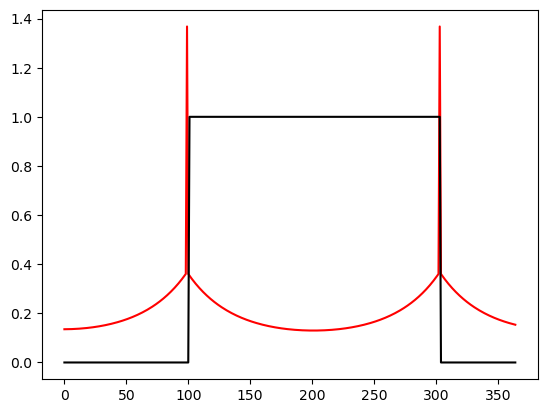

In [16]:
import matplotlib.pyplot as plt
plt.plot(rewards, color="red")
plt.plot(actions, color="black")
plt.show()

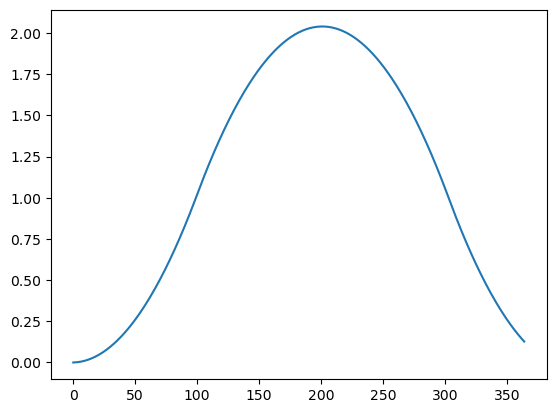

In [17]:
plt.plot(z_coordinate)
plt.show()

In [20]:
plotter = cplt.Plotter({"env": tf_env})
plotter.draw("3d", zrange=None)